<a href="https://colab.research.google.com/github/atikhasan007/Knowledge-Engineering/blob/main/GraphBasedClusteringExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of nodes: 34
Number of edges: 78


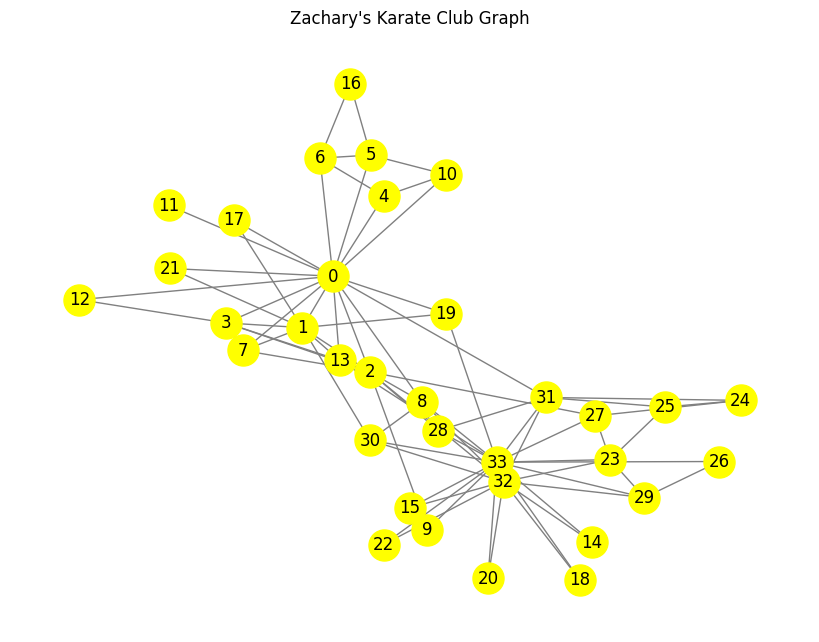

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary’s Karate Club graph
G = nx.karate_club_graph()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Visualize the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # layout for reproducibility
nx.draw(G, pos, with_labels=True, node_color="yellow", node_size=500, edge_color="gray")
plt.title("Zachary's Karate Club Graph")
plt.show()

In [ ]:
# Each node has an attribute 'club'
print(nx.get_node_attributes(G, "club"))

{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


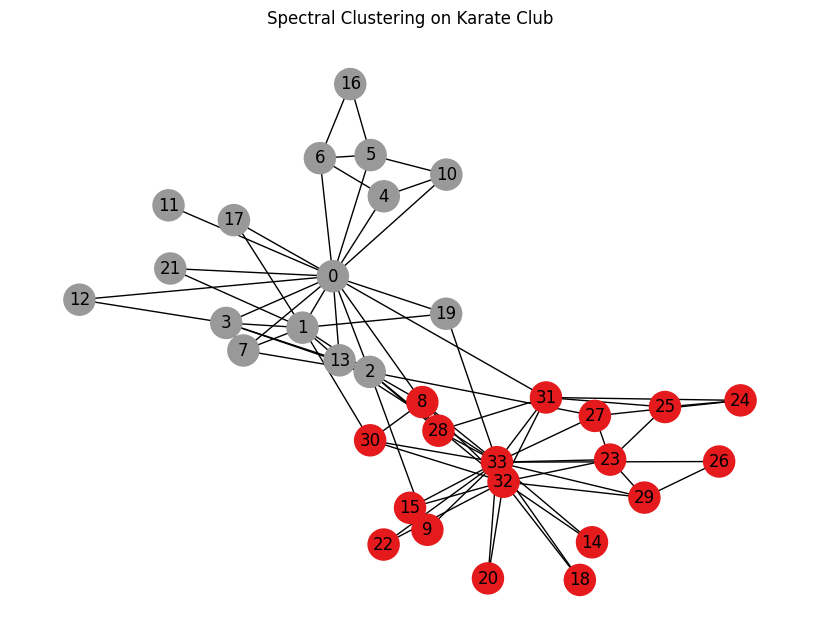

In [ ]:
from sklearn.cluster import SpectralClustering

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Run Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
labels = sc.fit_predict(adj_matrix)

# Visualize results
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=labels, with_labels=True, cmap=plt.cm.Set1, node_size=500)
plt.title("Spectral Clustering on Karate Club")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load graph
G = nx.karate_club_graph()

# Ground truth labels
true_labels = [1 if G.nodes[i]['club'] == 'Mr. Hi' else 0 for i in G.nodes()]

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
pred_labels = sc.fit_predict(adj_matrix)

# Compare results
print("True labels:    ", true_labels)
print("Predicted labels:", pred_labels.tolist())

True labels:     [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted labels: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



Adjusted Rand Index (ARI): 0.882
Normalized Mutual Info (NMI): 0.837


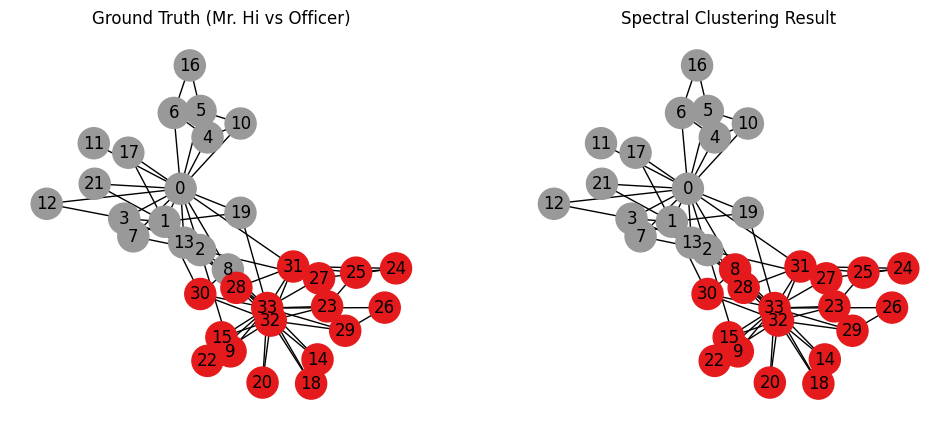

In [ ]:
# Evaluation metrics
ari = adjusted_rand_score(true_labels, pred_labels)
nmi = normalized_mutual_info_score(true_labels, pred_labels)

print(f"\nAdjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Info (NMI): {nmi:.3f}")

# Visualize clustering vs truth
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12,5))

# Left: Ground truth
plt.subplot(1,2,1)
nx.draw(G, pos, node_color=true_labels, with_labels=True, cmap=plt.cm.Set1, node_size=500)
plt.title("Ground Truth (Mr. Hi vs Officer)")

# Right: Spectral clustering
plt.subplot(1,2,2)
nx.draw(G, pos, node_color=pred_labels, with_labels=True, cmap=plt.cm.Set1, node_size=500)
plt.title("Spectral Clustering Result")

plt.show()